- Đọc data từ 2 file , lấy data từ cột điểm giữa kỳ (dãy X, Y) , điểm cuối kỳ (dãy Z)
- Xây dựng mô hình hồi quy tuyến tính chỉ rõ sự phụ thuộc của điểm cuối kỳ (z) theo các điểm giữa kỳ (x, y)

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
# đọc dữ liệu từ file excel
df1 = pd.read_excel("../../../Data/68IT1.xlsx", header=9)
df2 = pd.read_excel("../../../Data/68IT2.xlsx", header=9)

In [28]:
# lấy ra bảng điểm
table_score1 = df1.iloc[:,[6, 7, 8]]
table_score2 = df2.iloc[:,[6, 7, 8]]

In [29]:
# Đổi tên các cột
table_score1 = table_score1.rename(columns={'25%':'GK1', '25%.1':'GK2', 1:'CK'})

# 1. Xóa các hàng mà cả 3 cột đều NaN
table_score1 = table_score1.dropna(how='all')
# 2. Xóa các hàng mà cả 2 cột đầu đều NaN (GK1 và GK2)
table_score1 = table_score1.dropna(subset=['GK1', 'GK2'], how='all')
# 3. Xóa các hàng mà không có điểm cuối kỳ
table_score1 = table_score1.dropna(subset=['CK'], how='all')
# 4.Chỉ điền 0 vào các giá trị NaN dựa trên điều kiện mà không thay đổi cấu trúc DataFrame
table_score1[['GK1', 'GK2', 'CK']] = table_score1[['GK1', 'GK2', 'CK']].fillna(0)
# 5. Xóa hàng cuối cùng
table_score1 = table_score1.iloc[:-1]

In [30]:
# Đổi tên các cột
table_score2 = table_score2.rename(columns={'25%':'GK1', '25%.1':'GK2', 1:'CK'})

# 1. Xóa các hàng mà cả 3 cột đều NaN
table_score2 = table_score2.dropna(how='all')
# 2. Xóa các hàng mà cả 2 cột đầu đều NaN (GK1 và GK2)
table_score2 = table_score2.dropna(subset=['GK1', 'GK2'], how='all')
# 3. Xóa các hàng mà không có điểm cuối kỳ
table_score2 = table_score2.dropna(subset=['CK'], how='all')
# 4.Chỉ điền 0 vào các giá trị NaN dựa trên điều kiện mà không thay đổi cấu trúc DataFrame
table_score2[['GK1', 'GK2', 'CK']] = table_score2[['GK1', 'GK2', 'CK']].fillna(0)
# 5. Xóa hàng cuối cùng
table_score2 = table_score2.iloc[:-1]

In [31]:
# Nối 2 bảng điểm
table_score = pd.concat([table_score1, table_score2], ignore_index=True)
table_score

,GK1,GK2,CK
0,4.5,9.5,2.5
1,6.0,6.0,2.0
2,7.5,9.0,4.5
3,4.0,10.0,3.0
4,6.5,5.0,0.5
...,...,...,...
97,2.0,3.0,0.5
98,6.0,1.5,2.0
99,0.5,0.0,0.0
100,7.5,8.0,4.0


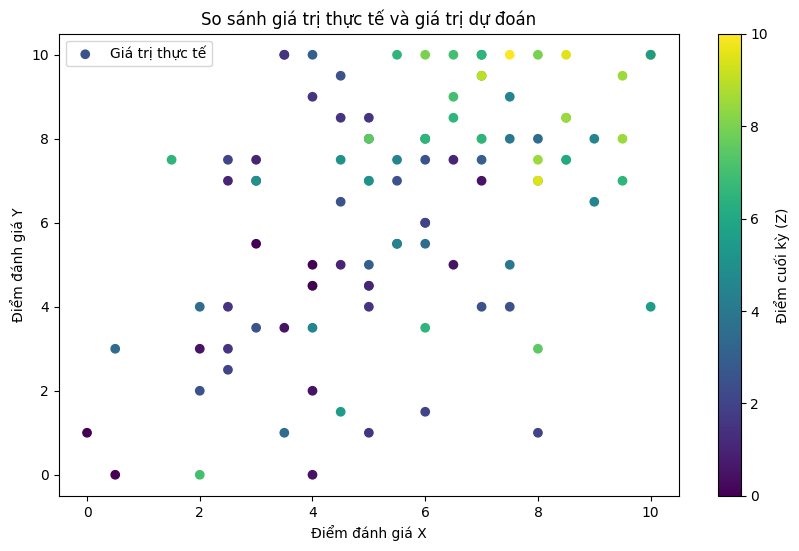

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(table_score['GK1'], table_score['GK2'], c=table_score['CK'], cmap='viridis', marker='o', label='Giá trị thực tế')
# plt.scatter(table_score['GK1'], table_score['GK2'], c=table_score['CK_pred'], cmap='plasma', marker='x', label='Giá trị dự đoán')
plt.colorbar(label='Điểm cuối kỳ (Z)')
plt.title('So sánh giá trị thực tế và giá trị dự đoán')
plt.xlabel('Điểm đánh giá X')
plt.ylabel('Điểm đánh giá Y')
plt.legend()
plt.show()

In [33]:
# Lấy ra đặc trưng và đích
features = table_score[['GK1', 'GK2']]
labels = table_score[['CK']]

In [34]:
# import model từ thư viện sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [35]:
# Chia dữ liệu thành tập huấn luyện và kiểm thử
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)


In [36]:
# Tạo mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [37]:
# Dự đoán trên tập kiểm thử
y_pred = model.predict(X_test)

In [38]:
# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 5.654932953857592


In [39]:
# Xem các hệ số của phương trình hồi quy
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [[0.57751576 0.21926003]]
Intercept: [-0.66635197]


In [40]:
# Dự đoán cho x và y ngẫu nhiên
new_data = np.array([[7.5, 8.0]])
predicted_z = model.predict(new_data)
print(f"Dự đoán giá trị z cho x = 7.5 và y = 8.0 là: {predicted_z[0]}")

Dự đoán giá trị z cho x = 7.5 và y = 8.0 là: [5.41909646]


d:\Python\Machine_Learning\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
